# Esercizio 1

**La legge dei grandi numeri**

In [2]:
# Scriviamo una funzione che simula il lancio di una moneta N volte e restituisce la frequenza di volte che è uscita testa
import random

def lancio_moneta(N):
    """
    Parametri:
        N (int): numero di lanci
    
    Output:
        frequenza (float): frequenza in percentuale
    """ 
    results = [random.randint(0,1) for x in range(N)]
    head_number = results.count(1)

    return (head_number / N) * 100

N = int(input("Inserire numero di lanci: "))
print("Provvedo alla simulazione...")
print(f"Frequenza relativa: {round(lancio_moneta(N),2)}%")

Provvedo alla simulazione...
Frequenza relativa: 60.0%


In [3]:
# Calcoliamo la frequenza con la grandezza del campione che varia 100 volte da 10 a 20000

# Creiamo una lista di 100 elementi con il range di numero di lanci che varia
simulation_throw_1 = [random.randint(10,1000) for x in range(100)]
simulation_throw_1.sort()
print(simulation_throw_1)
simulation_throw_2 = [random.randint(10,5000) for x in range(100)]
simulation_throw_2.sort()
simulation_throw_3 = [random.randint(10,10000) for x in range(100)]
simulation_throw_3.sort()
simulation_throw_4 = [random.randint(10,20000) for x in range(100)]
simulation_throw_4.sort()

# Troviamo le frequenze delle liste definite precedentemente
frequency_1 = [lancio_moneta(x) for x in simulation_throw_1]
frequency_2 = [lancio_moneta(x) for x in simulation_throw_2]
frequency_3 = [lancio_moneta(x) for x in simulation_throw_3]
frequency_4 = [lancio_moneta(x) for x in simulation_throw_4]

[11, 14, 38, 67, 115, 118, 120, 120, 121, 131, 145, 147, 167, 171, 174, 185, 190, 198, 208, 216, 220, 248, 248, 258, 284, 288, 291, 296, 301, 314, 327, 331, 344, 351, 359, 362, 375, 380, 382, 385, 389, 390, 397, 408, 410, 429, 432, 459, 461, 466, 467, 485, 493, 505, 525, 529, 560, 566, 577, 599, 611, 622, 626, 628, 639, 656, 661, 687, 701, 706, 712, 741, 763, 763, 766, 770, 778, 792, 815, 828, 829, 829, 846, 863, 874, 875, 882, 883, 898, 902, 916, 936, 944, 945, 947, 956, 969, 970, 989, 991]


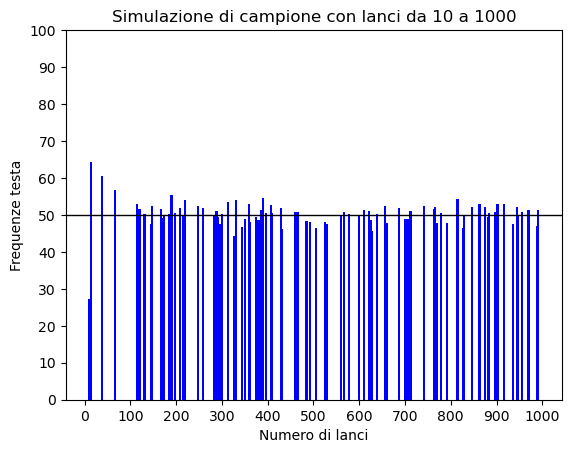

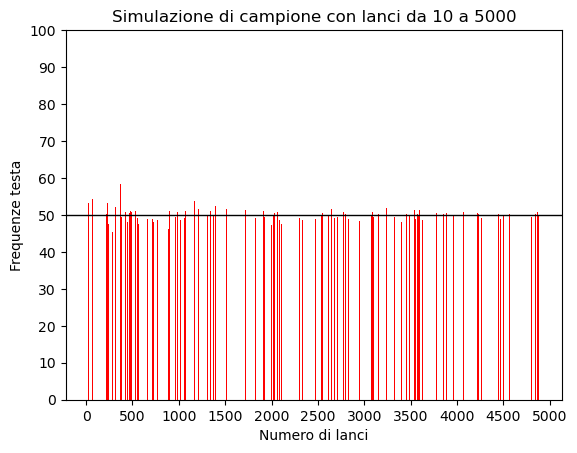

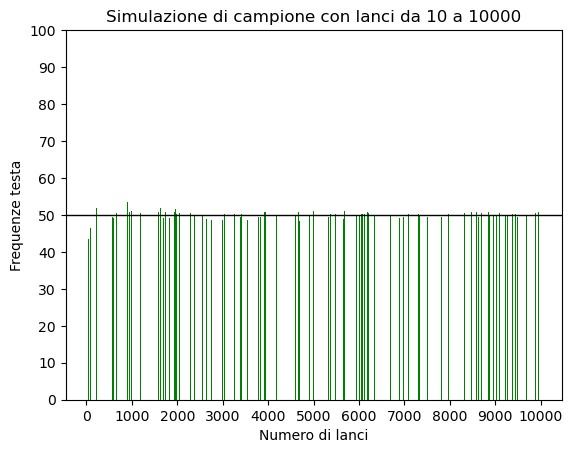

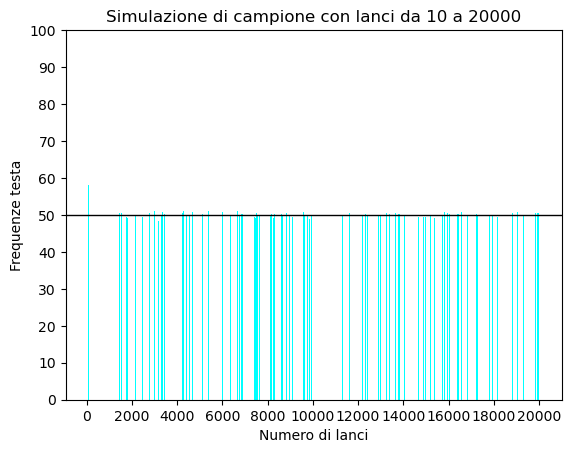

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Primo campione
plt.bar(simulation_throw_1,frequency_1, width=5, color = ['blue'])
plt.title("Simulazione di campione con lanci da 10 a 1000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,1001,100)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Secondo campione
plt.bar(simulation_throw_2,frequency_2, width=10, color = ['red'])
plt.title("Simulazione di campione con lanci da 10 a 5000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,5001,500)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Terzo campione
plt.bar(simulation_throw_3,frequency_3, width=20, color = ['green'])
plt.title("Simulazione di campione con lanci da 10 a 10000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,10001,1000)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Quarto campione
plt.bar(simulation_throw_4,frequency_4, width=40, color = ['cyan'])
plt.title("Simulazione di campione con lanci da 10 a 20000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,20001,2000)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Notiamo che più si alza il numero di lanci più la percentuale di uscita di testa si posiziona sul 50%


# Esercizio 2


**Analisi del Dataset Titanic**

In [5]:
# Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Contiamo le righe e le colonne del dataset
print(f"Il Dataset ha {len(df)} righe e {len(df.columns)} colonne")

# Creiamo un indice sulle colonen
c_index = df.columns

# Per ogni colonna contiamo il numero di righe senza valori mancanti e lo sottraiamo al totale delle righe
for column in c_index:
    NaN_counter = len(df) - len(df[df[column].notna()])
    print(f"La colonna '{column}' ha {NaN_counter} valori mancanti")

Il Dataset ha 891 righe e 12 colonne
La colonna 'PassengerId' ha 0 valori mancanti
La colonna 'Survived' ha 0 valori mancanti
La colonna 'Pclass' ha 0 valori mancanti
La colonna 'Name' ha 0 valori mancanti
La colonna 'Sex' ha 0 valori mancanti
La colonna 'Age' ha 177 valori mancanti
La colonna 'SibSp' ha 0 valori mancanti
La colonna 'Parch' ha 0 valori mancanti
La colonna 'Ticket' ha 0 valori mancanti
La colonna 'Fare' ha 0 valori mancanti
La colonna 'Cabin' ha 687 valori mancanti
La colonna 'Embarked' ha 2 valori mancanti


In [7]:
# Riempiamo i valori mancanti nella colonna 'Embarked' con il valore più frequente

# Calcoliamo il valore più frequente
most_frequent = df['Embarked'].mode()[0]

# Creiamo una lista booleana 
values = [df['Embarked'].notna()]

# Sostituiamo i valori False
for item in values:

    if item is False:
        item = most_frequent

# Sostituiamo nel Dataset
df.Embarked = most_frequent
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [8]:
# Rimuoviamo le righe dove il valore di 'Age' è mancante

# Creiamo una lista contenente gli indici dei valori NaN
NaN_index = df[df['Age'].isna()].index
original_lenght = len(df)

# Utilizziamo 'drop' con 'inplace=True' per rimuovere le righe nel databse originario
df.drop(NaN_index, axis=0,inplace=True)
new_lenght = len(df)

print(f"Numero di righe del database originario: {original_lenght}\nNumero di righe del nuovo database: {new_lenght}")

Numero di righe del database originario: 891
Numero di righe del nuovo database: 714


In [10]:
# Controlliamo se ci sono righe duplicate

# Creiamo un nuovo database identico a quello su cui stiamo lavorando ed eliminiamo i duplicati
new_df = df.copy(deep=True)
new_df.drop_duplicates()

if len(df) > len(new_df):
    print(f"Il database ha esattamente {len(df) - len(new_df)} righe duplicate")
else:
    print("Il database non ha righe duplicate")

Il database non ha righe duplicate


In [ ]:
# Calcoliamo l'età media per odni classe di passeggeri

# Calcoliamo l'età media generale dei passeggeri e sostituiamola
avrg = {"Age": int(df["Age"].mean())}
df.fillna(value=avrg, inplace=True)

# Calcoliamo l'eta media per ciascuna classe
avrg_ages = df.groupby("Pclass")["Age"].mean()

for pclass, media in avrg_ages.items():
    print(f"Classe {pclass}: {int(media)} anni di media")

Classe 1: 38 anni di media
Classe 2: 29 anni di media
Classe 3: 25 anni di media


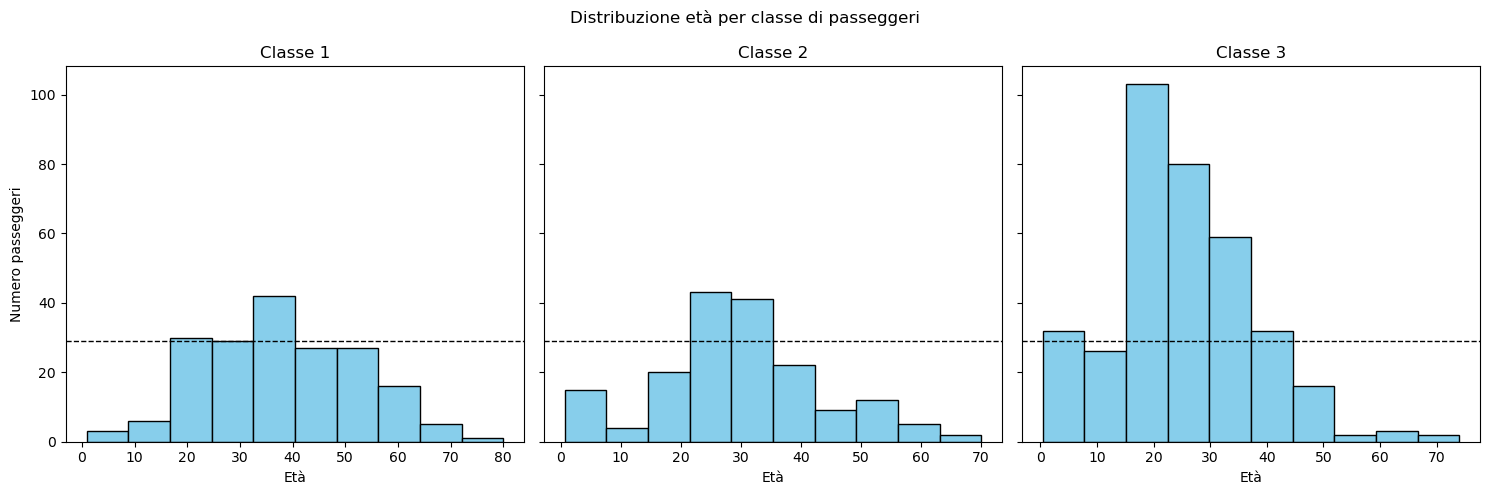

In [119]:
import matplotlib.pyplot as plt

ages_by_class = df.groupby("Pclass")["Age"].apply(list)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, (pclass, ages) in enumerate(ages_by_class.items()):
    axs[i].hist(ages, bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(f"Classe {pclass}")
    axs[i].set_xlabel("Età")
    axs[i].axhline(y=int(df["Age"].mean()), color='black', linestyle='--', linewidth=1)

axs[0].set_ylabel("Numero passeggeri")
plt.suptitle("Distribuzione età per classe di passeggeri")
plt.tight_layout()
plt.show()

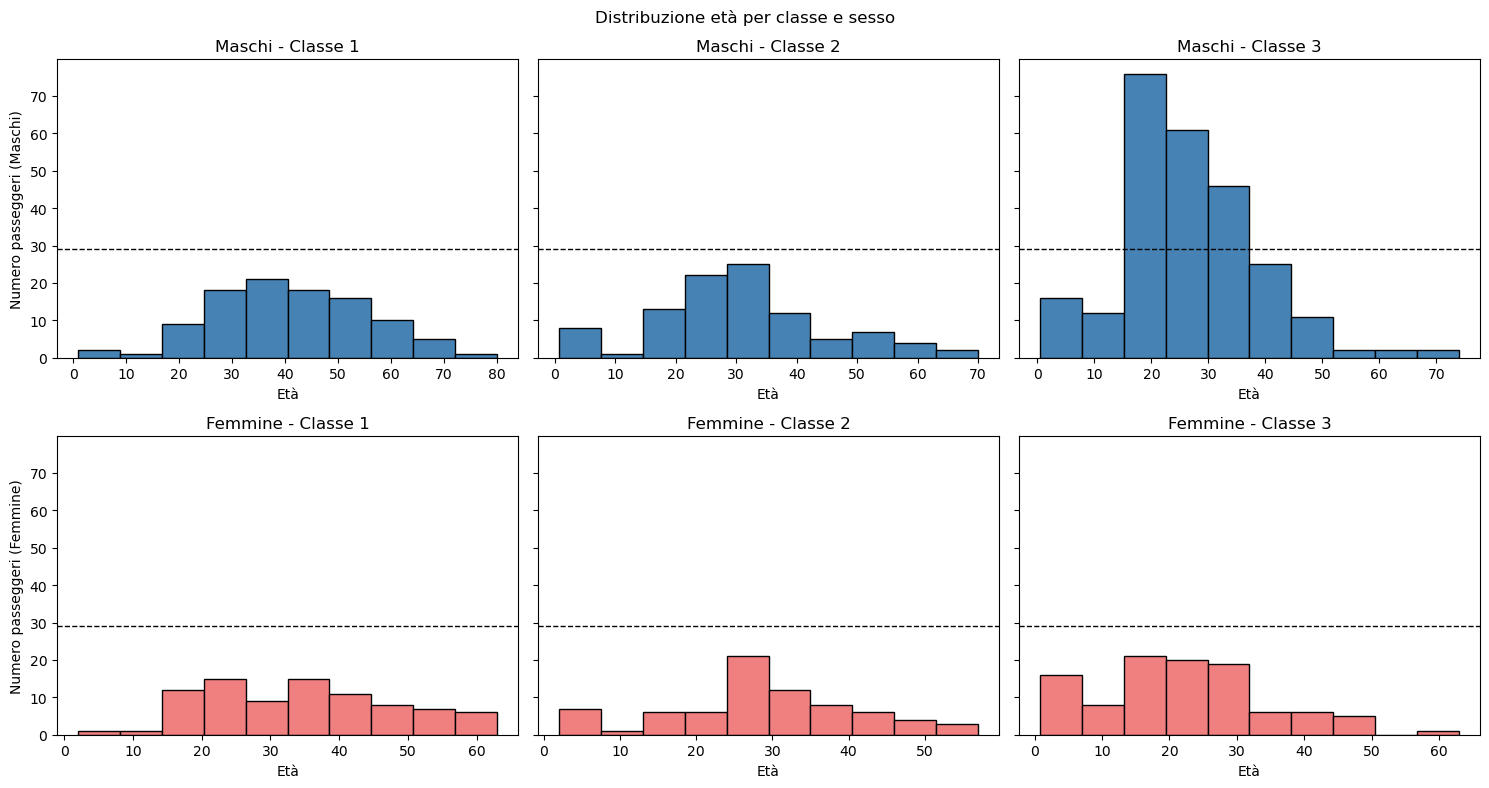

In [ ]:
import matplotlib.pyplot as plt

df_male = df[df["Sex"] == "male"]
male_ages_by_class = df_male.groupby("Pclass")["Age"].apply(list)

df_female = df[df["Sex"] == "female"]
female_ages_by_class = df_female.groupby("Pclass")["Age"].apply(list)

fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=True)

# Maschi nella prima riga
for i, (pclass, ages) in enumerate(male_ages_by_class.items()):
    axs[0, i].hist(ages, bins=10, color='steelblue', edgecolor='black')
    axs[0, i].set_title(f"Maschi - Classe {pclass}")
    axs[0, i].set_xlabel("Età")
    axs[0, i].axhline(y=int(df["Age"].mean()), color='black', linestyle='--', linewidth=1)

# Femmine nella seconda riga
for i, (pclass, ages) in enumerate(female_ages_by_class.items()):
    axs[1, i].hist(ages, bins=10, color='lightcoral', edgecolor='black')
    axs[1, i].set_title(f"Femmine - Classe {pclass}")
    axs[1, i].set_xlabel("Età")
    axs[1, i].axhline(y=int(df["Age"].mean()), color='black', linestyle='--', linewidth=1)

# Etichetta asse Y solo sulla prima colonna
axs[0, 0].set_ylabel("Numero passeggeri (Maschi)")
axs[1, 0].set_ylabel("Numero passeggeri (Femmine)")

plt.suptitle("Distribuzione età per classe e sesso")
plt.tight_layout()
plt.show()

# Esercizio 3

**Analisi del Dataset Iris**

In [121]:
# caricamento del Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Contiamo quanti campioni ci sono per specie

# Contiamo quante specie ci sono 
species = df["species"].unique()

for name in species:
    print(f"La specie '{name}' conta {len(df[df["species"] == name])} individui")

La specie 'setosa' conta 50 individui
La specie 'versicolor' conta 50 individui
La specie 'virginica' conta 50 individui


In [147]:
# Calcoliamo la lunghezza e la larghezza media dei petali per specie

# Vediamo la lunghezza
petal_length = df.groupby("species")["petal_length"].mean()
print(petal_length)

# Vediamo la larghezza
petal_width = df.groupby("species")["petal_width"].mean()
print(petal_width)

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64
species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64


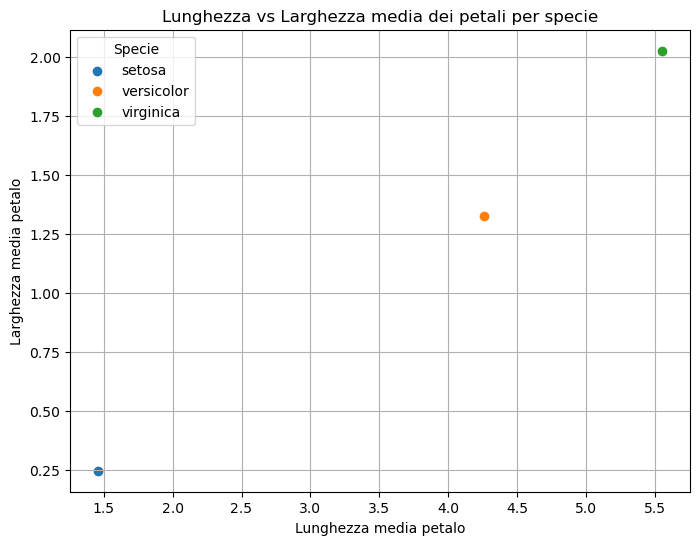

In [ ]:
plt.figure(figsize=(8, 6))

for species in petal_length.index:
    x = petal_length[species]
    y = petal_width[species]
    plt.scatter(x, y, label=species)

# Estetica del grafico
plt.title("Lunghezza vs Larghezza media dei petali per specie")
plt.xlabel("Lunghezza media petalo")
plt.ylabel("Larghezza media petalo")
plt.legend(title="Specie")
plt.grid(True)
plt.show()

In [150]:
df["petal_area"] = df["petal_length"] * df["petal_width"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


In [ ]:
area_per_species = df.groupby("species")["petal_area"].apply(list)
print(area_per_species)

# fig, axs = plt.subplots(1, 3, figsize=(15, 8), sharey=True)

# Maschi nella prima riga
# plt.figure(figsize=(10, 6))
# plt.bar(area_per_species[species], area_per_species[peta], color='skyblue', edgecolor='black')

# # Aggiunta delle linee del valore medio e mediano
# plt.axvline(x=valore_medio, color='red', linestyle='-', label=f'Valore Medio: {valore_medio:.2f}')
# plt.axvline(x=valore_mediano, color='purple', linestyle='--', label=f'Mediana: {valore_mediano:.2f}')

# # Aggiunta del titolo e delle etichette agli assi
# plt.title('Distribuzione delle Valutazioni a Stelle con Media e Mediana')
# plt.xlabel('Numero di Stelle')
# plt.ylabel('Frequenza')
# plt.xticks(valori)  # Assicura che vengano mostrati tutti i valori delle stelle sull'asse x
# plt.legend()

# # Mostra il grafico
# plt.show()


KeyError: 'key of type tuple not found and not a MultiIndex'